In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times"

In [2]:
df = pd.read_csv("../data/data.csv", skiprows=1)

In [4]:
df

,group,z,theta,z_dot,theta_dot,u
0,0,0.941923,0.000000,0.000000,0.000000,-3.893955
1,0,0.941923,0.000000,-0.131998,0.527994,-2.870242
2,0,0.937449,0.017898,-0.229295,0.917179,-1.852518
3,0,0.929676,0.048989,-0.292031,1.144278,-0.883965
4,0,0.919777,0.087778,-0.321827,1.198182,-0.005614
...,...,...,...,...,...,...
29995,499,0.034900,-2.960168,-0.252652,-1.594876,1.072835
29996,499,0.026336,-3.014231,-0.215746,-1.209668,1.518669
29997,499,0.019022,-3.055237,-0.163871,-0.834894,2.039225
29998,499,0.013468,-3.083539,-0.094469,-0.443596,2.659743


In [5]:
feat_names = {"z" : "$z$",
              "z_dot" : "$\dot{z}$",
              "theta" : "$\\theta$",
              "theta_dot" : "$\dot{\\theta}$",
              "u" : "$u$"}
print("Feat. & Mean & Std. Dev. & Min. & 25\% & 50\% & 75\% & Max. \\\\ \\hline")
for col in df.drop(columns=["group"]).columns:
    stats = df[col].describe()
    print(feat_names[col] + " & " + " & ".join(list("{:.02f}".format(num) for num in stats.to_numpy()[1:])) + " \\\\")

Feat. & Mean & Std. Dev. & Min. & 25\% & 50\% & 75\% & Max. \\ \hline
$z$ & 0.09 & 0.72 & -2.00 & -0.23 & 0.02 & 0.45 & 1.96 \\
$\theta$ & -0.51 & 1.41 & -3.13 & -1.48 & -0.20 & 0.39 & 1.70 \\
$\dot{z}$ & 0.03 & 0.73 & -1.94 & -0.37 & 0.00 & 0.55 & 1.70 \\
$\dot{\theta}$ & -1.52 & 4.64 & -11.33 & -3.59 & -1.28 & 1.10 & 7.84 \\
$u$ & 0.00 & 2.15 & -5.44 & -1.45 & -0.14 & 1.44 & 5.43 \\


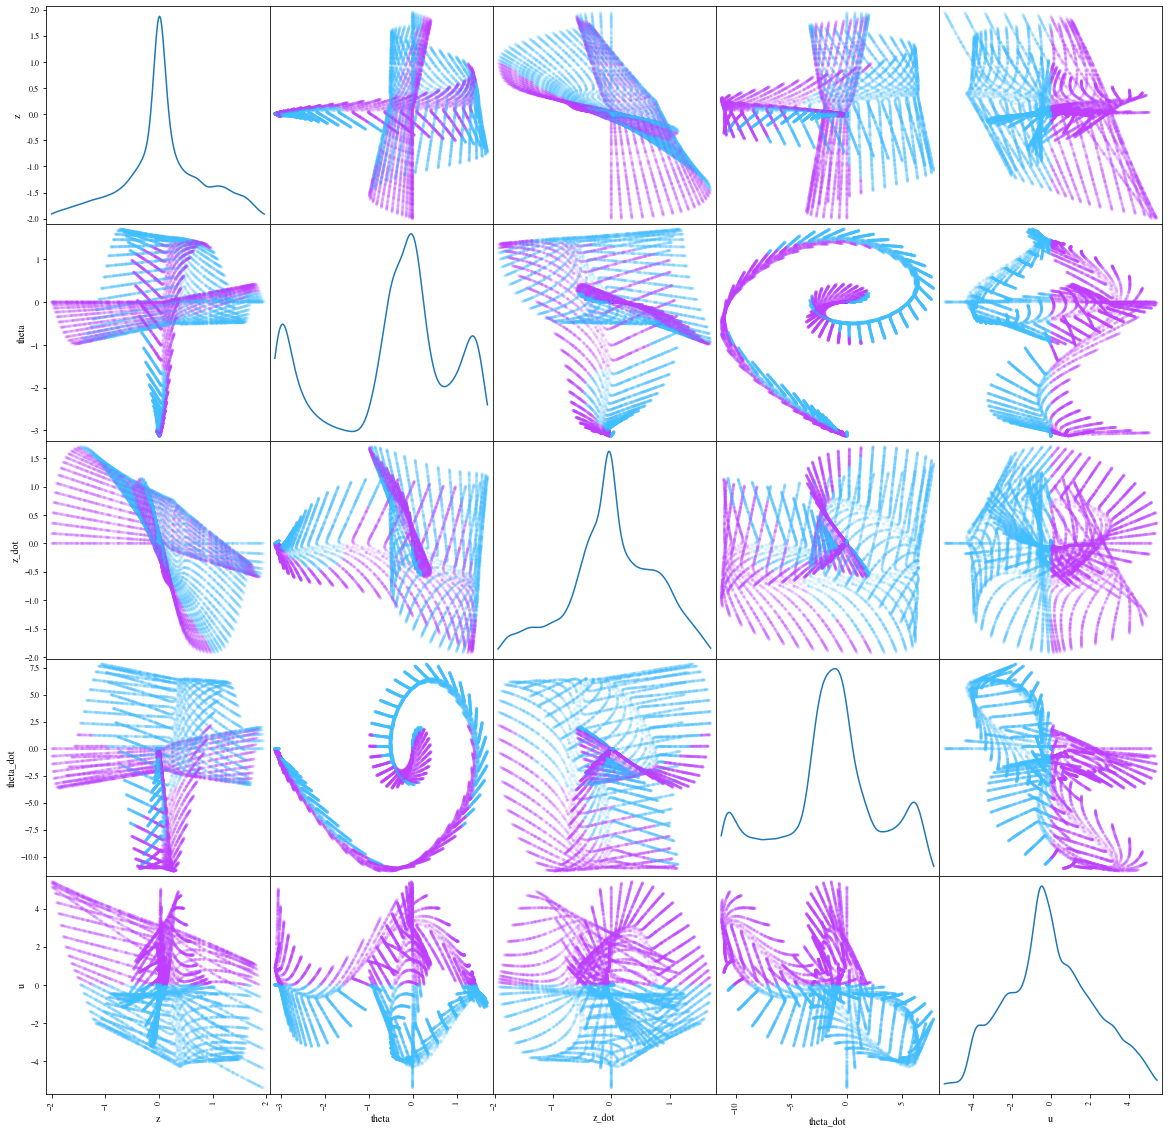

In [6]:
pd.plotting.scatter_matrix(df.drop(columns=["group"]), alpha=0.1, diagonal="kde", figsize=(20,20), c=df["u"] > 0, cmap="cool", vmin=-0.5, vmax=1.5);

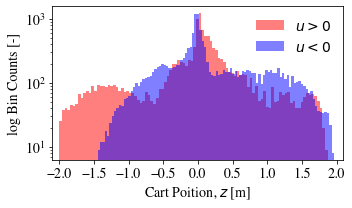

In [63]:
plt.figure(figsize=(5,3))
plt.hist(df["z"][df["u"] > 0], alpha=0.5, color="red", label=r"$u > 0$", bins=100)
plt.hist(df["z"][df["u"] < 0], alpha=0.5, color="blue", label=r"$u < 0$", bins=100)
plt.semilogy()
plt.legend(frameon=False, fontsize=14)
plt.xlabel(r"Cart Poition, $z$ [m]", fontsize=14)
plt.ylabel("log Bin Counts [-]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-2.1, 2.1])
plt.tight_layout()
plt.savefig("../figures/eda/z_hist.png", dpi=500)

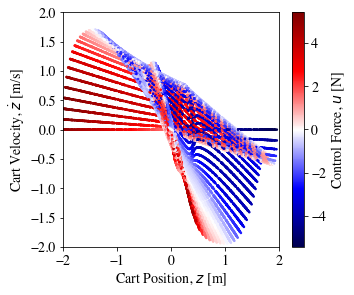

In [64]:
plt.figure(figsize=(5,4.2))
plt.scatter(df["z"], df["z_dot"], c=df["u"], alpha=1, marker=".", s=10, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=14)
plt.xlabel(r"Cart Position, $z$ [m]", fontsize=14)
plt.ylabel(r"Cart Velocity, $\dot{z}$ [m/s]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.tight_layout()
plt.savefig("../figures/eda/z_z_dot_scatter.png", dpi=500)

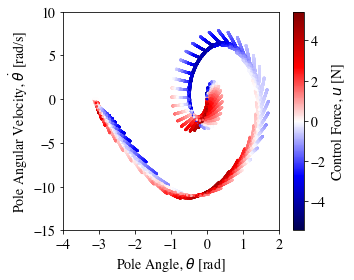

In [65]:
plt.figure(figsize=(5,4))
plt.scatter(df["theta"], df["theta_dot"], alpha=1, c=df["u"], marker=".", s=10, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=14)
plt.xlabel(r"Pole Angle, $\theta$ [rad]", fontsize=14)
plt.ylabel(r"Pole Angular Velocity, $\dot{\theta}$ [rad/s]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-4, 2])
plt.ylim([-15, 10])
plt.tight_layout()
plt.savefig("../figures/eda/theta_theta_dot_scatter.png", dpi=500)